In [24]:
import pandas as pd
from pandas import Timestamp, DatetimeIndex
from datetime import date, time

pd.to_datetime('2018-01-15 15:45')
Timestamp('2018-01-15 15:45:00')
pd.to_datetime('7/8/1952')
Timestamp('1952-07-08 00:00:00')

Timestamp('1952-07-08 00:00:00')

In [25]:
pd.to_datetime('7/8/1952', dayfirst=True)
Timestamp('1952-08-07 00:00:00')

Timestamp('1952-08-07 00:00:00')

In [26]:
pd.to_datetime(['05.01.2018', '08.07.1952', '10. 10. 1995'], format='mixed')
DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [27]:
#opsd_daily = pd.read_csv('opsd_Germany_daily.csv')
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

opsd_daily.shape

(4383, 5)

In [28]:
opsd_daily.head(3)

Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN

In [29]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [30]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN

In [35]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [36]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [32]:
#opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [38]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

Consumption    Wind    Solar  Wind+Solar  Year  Month Weekday Name
Date                                                                          
2008-08-23     1152.011     NaN      NaN         NaN  2008      8     Saturday
2013-08-08     1291.984  79.666   93.371     173.037  2013      8     Thursday
2009-08-27     1281.057     NaN      NaN         NaN  2009      8     Thursday
2015-10-02     1391.050  81.229  160.641     241.870  2015     10       Friday
2009-06-02     1201.522     NaN      NaN         NaN  2009      6      Tuesday

In [39]:
opsd_daily.loc['2017-08-10']

Consumption     1351.491
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [40]:
opsd_daily.loc['2014-01-20':'2014-01-22']

Consumption    Wind   Solar  Wind+Solar  Year  Month Weekday Name
Date                                                                         
2014-01-20     1590.687  78.647   6.371      85.018  2014      1       Monday
2014-01-21     1624.806  15.643   5.835      21.478  2014      1      Tuesday
2014-01-22     1625.155  60.259  11.992      72.251  2014      1    Wednesday

In [43]:
opsd_daily.loc['2012-02'].head()

Consumption     Wind   Solar  Wind+Solar  Year  Month Weekday Name
Date                                                                          
2012-02-01     1511.866  199.607  43.502     243.109  2012      2    Wednesday
2012-02-02     1563.407   73.469  44.675     118.144  2012      2     Thursday
2012-02-03     1563.631   36.352  46.510      82.862  2012      2       Friday
2012-02-04     1372.614   20.551  45.225      65.776  2012      2     Saturday
2012-02-05     1279.432   55.522  54.572     110.094  2012      2       Sunday

In [45]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


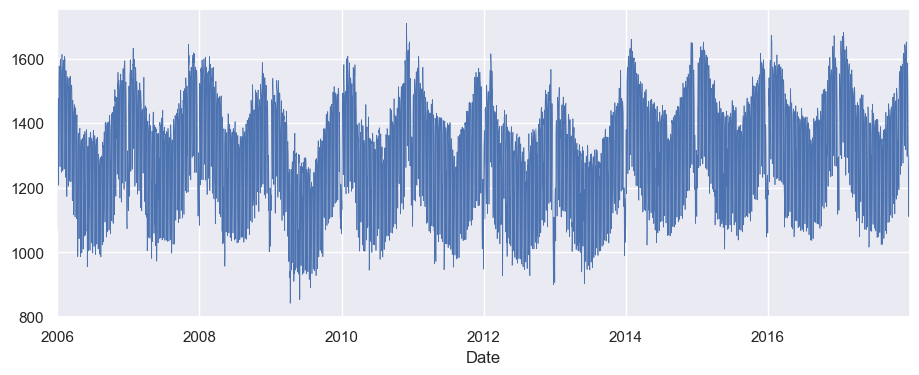

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
opsd_daily['Consumption'].plot(linewidth=0.5);

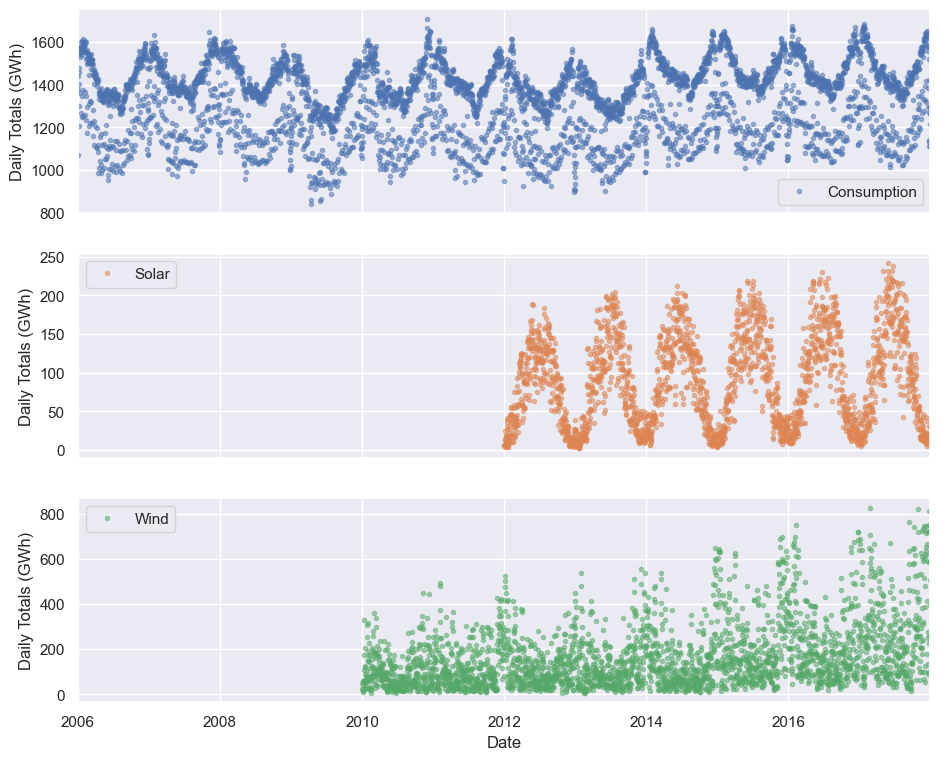

In [47]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

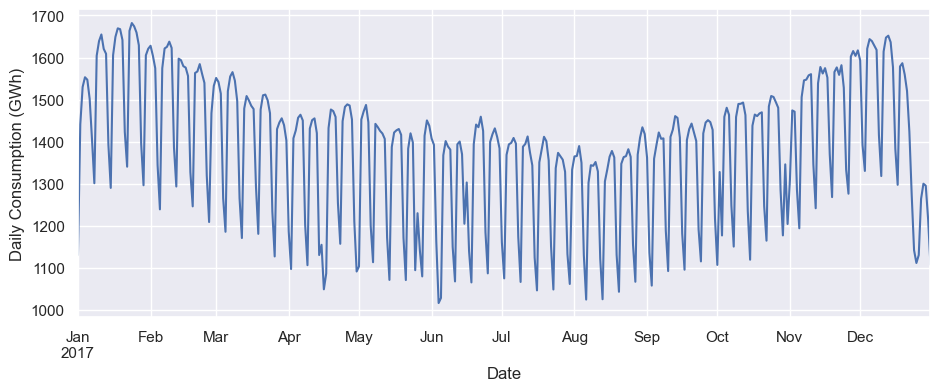

In [48]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

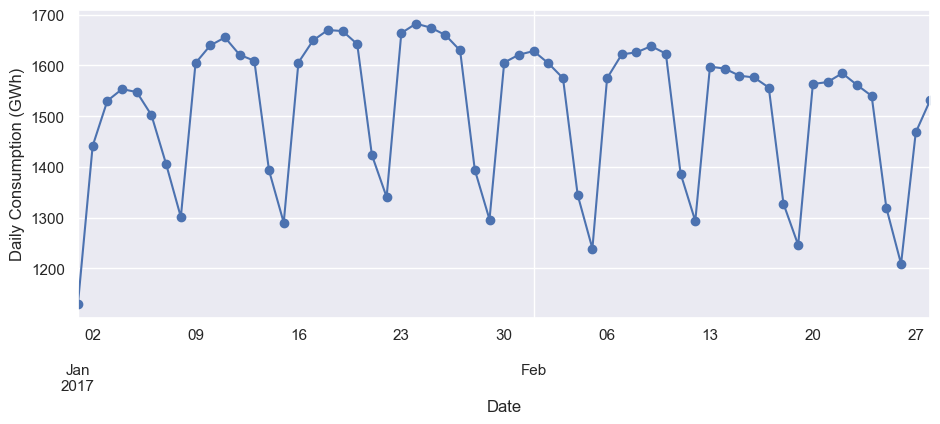

In [49]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

TypeError: DateFormatter.__init__() missing 1 required positional argument: 'fmt'

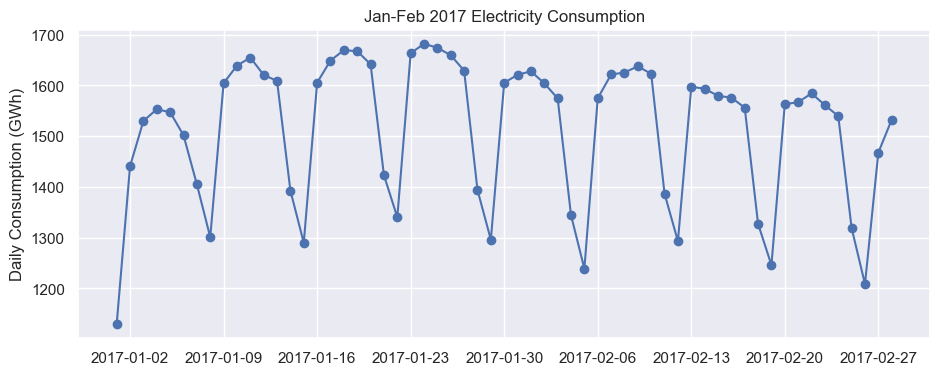

In [50]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter())

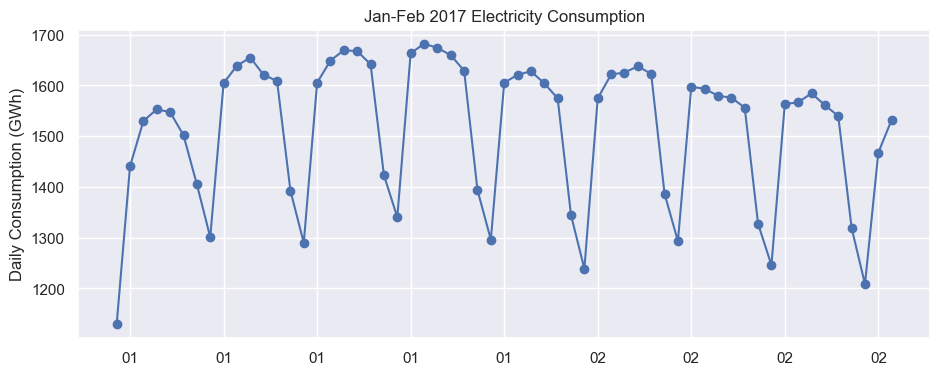

In [51]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
myFmt = mdates.DateFormatter('%m')
ax.xaxis.set_major_formatter(myFmt)

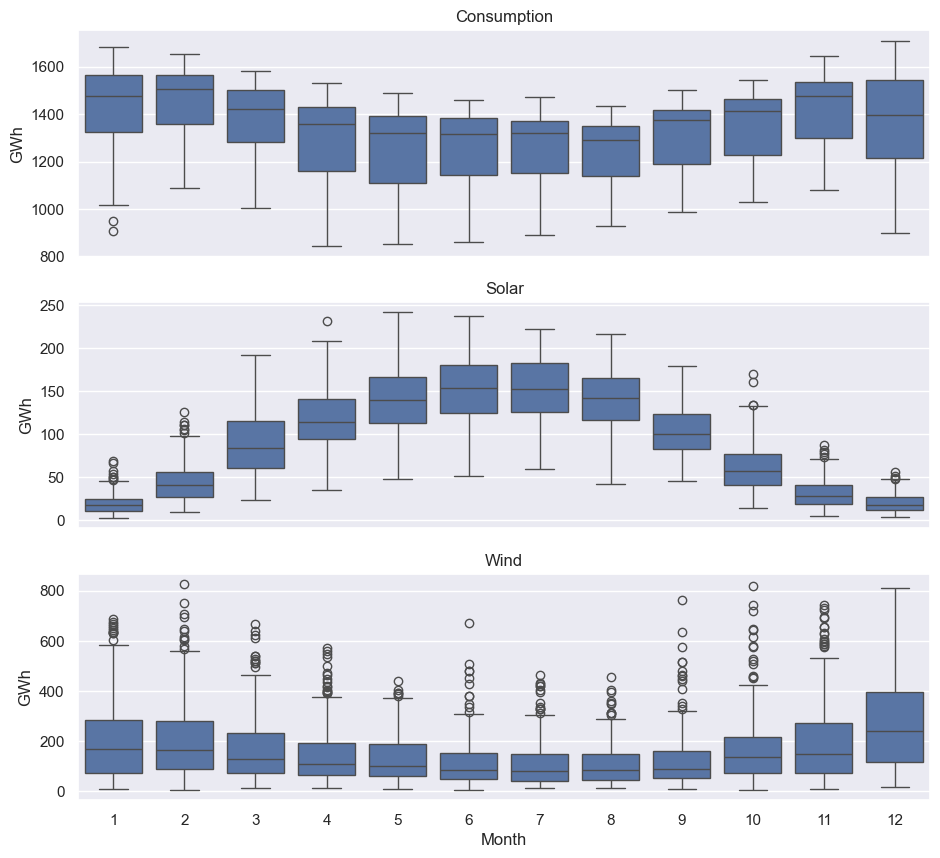

In [53]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

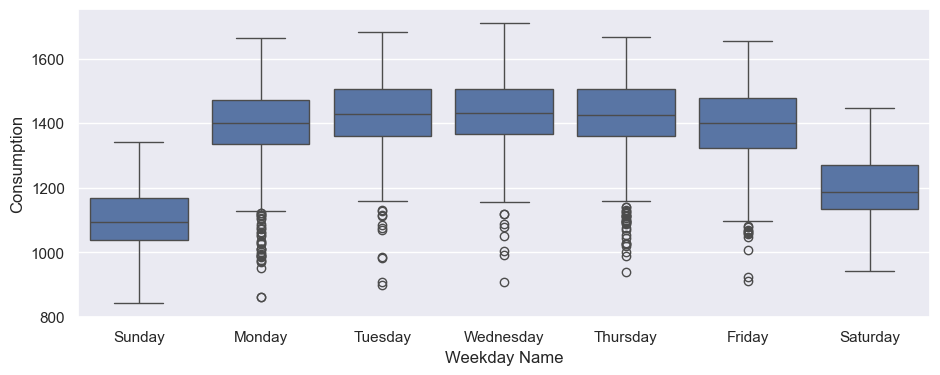

In [54]:

sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');